This script was ellaborated to analyse data of wheat seeds from the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. The exploratory data analysis aimed to understand the features and identify the best features to use as classifiers of wheat type. 

Data is structures as follows:

1. area,
2. perimeter,
3. compactness (4*pi*A/P^2),
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient,
7. length of kernel groove

Data was dowloaded from the UCI Machine Learning repository. 


In [65]:
# Load basic libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

# Load functions for specific plots

from pandas.plotting import scatter_matrix
from pandas.plotting import parallel_coordinates
from pandas.plotting import andrews_curves
from mpl_toolkits.mplot3d import Axes3D

# Improve visualisation
plt.style.use('ggplot')
%matplotlib notebook


In [66]:
# Load wheat dataset

df = pd.read_csv("C:/Users/Renata/Desktop/DAT210x-master/Module3/Datasets/wheat.data", index_col = "id")

# Read first few lines

df.head()


,area,perimeter,compactness,length,width,asymmetry,groove,wheat_type
id,,,,,,,,
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,kama


In [67]:
# Get a summary of the features in the dataset

df.describe()

,area,perimeter,compactness,length,width,asymmetry,groove
count,210.000000,210.000000,207.000000,210.000000,209.000000,210.000000,206.000000
mean,14.847524,14.559286,0.871280,5.563918,3.281440,3.693530,5.407529
std,2.909699,1.305959,0.023306,0.719594,0.419907,1.495112,0.532330
min,10.590000,12.410000,0.808100,0.818900,2.630000,0.765100,3.485000
25%,12.270000,13.450000,0.857700,5.244750,2.956000,2.600250,5.045000
50%,14.355000,14.320000,0.873500,5.518000,3.245000,3.599000,5.226000
75%,17.305000,15.715000,0.887650,5.979750,3.566000,4.768750,5.879000
max,21.180000,17.250000,0.918300,6.675000,5.325000,8.456000,6.735000


Everything looks fine with the data. Now let's go ahead and start to visualise these features. As there are not a large number of features, a scatter matrix is a good choice to have a general idea of distribution and correlation between them.

<IPython.core.display.Javascript object>


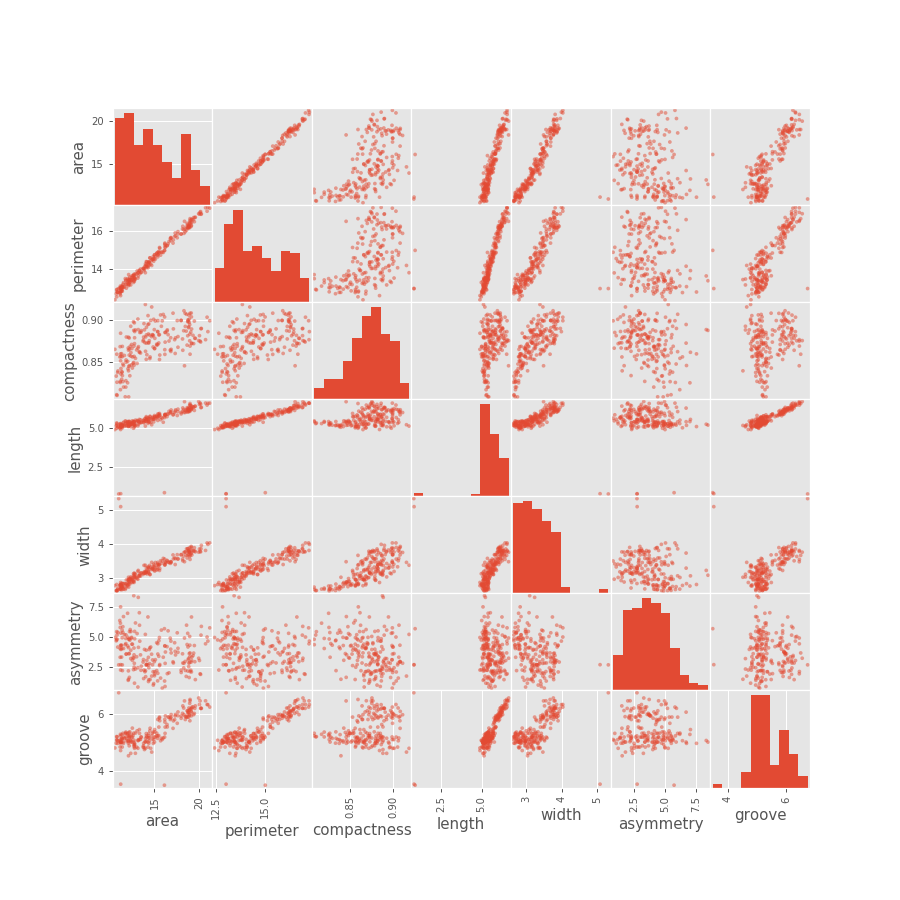

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001AA986A0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001C430438>]], dtype=object)

In [68]:
# Plot a scatter matrix

scatter_matrix(df, figsize = (10,10))


A few observations:
- Area and perimeter have a nice linear correlation, which makes total sense as the area will depende on the perimeter;
- A few lenght, width and groove outliers can be identified through histograms and scatter plots;
- Asymmetry and compactness present large variance and no to little correlation with all other features.

Now a quick look at the correlations between properties.

<IPython.core.display.Javascript object>


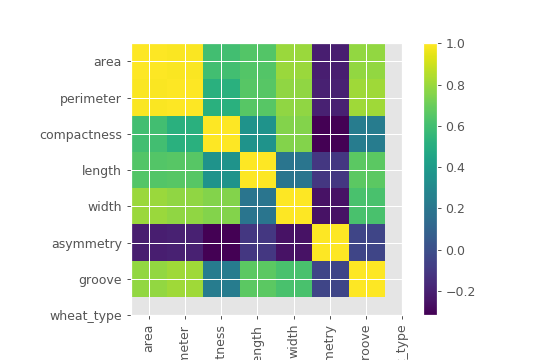

([<matplotlib.axis.YTick at 0x1ca95898>,
 <a list of 8 Text yticklabel objects>)

In [69]:
# Get the correlation matrix

df.corr()

# Plot the correlation matrix

fig = plt.figure()
plt.imshow(df.corr(), interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)


The correlation coefficients confirm the observations made previously. Now it is clear that asymmetry is the feature least correlated with all others.

Now it is interesting to investigate how properties vary with wheat type. Let's check how many different types we are dealing with.

In [70]:
# Get wheat types
print(df.wheat_type.unique())

# Set a dictionary with color labels for each type
labels = ['red' if i == 'kama'
          else
          'green' if i == 'canadian'
          else
          'blue' for i in df.wheat_type]

['kama' 'canadian' 'rosa']


There are three wheat types, and those can be added for more information about the features' distribution.

<IPython.core.display.Javascript object>


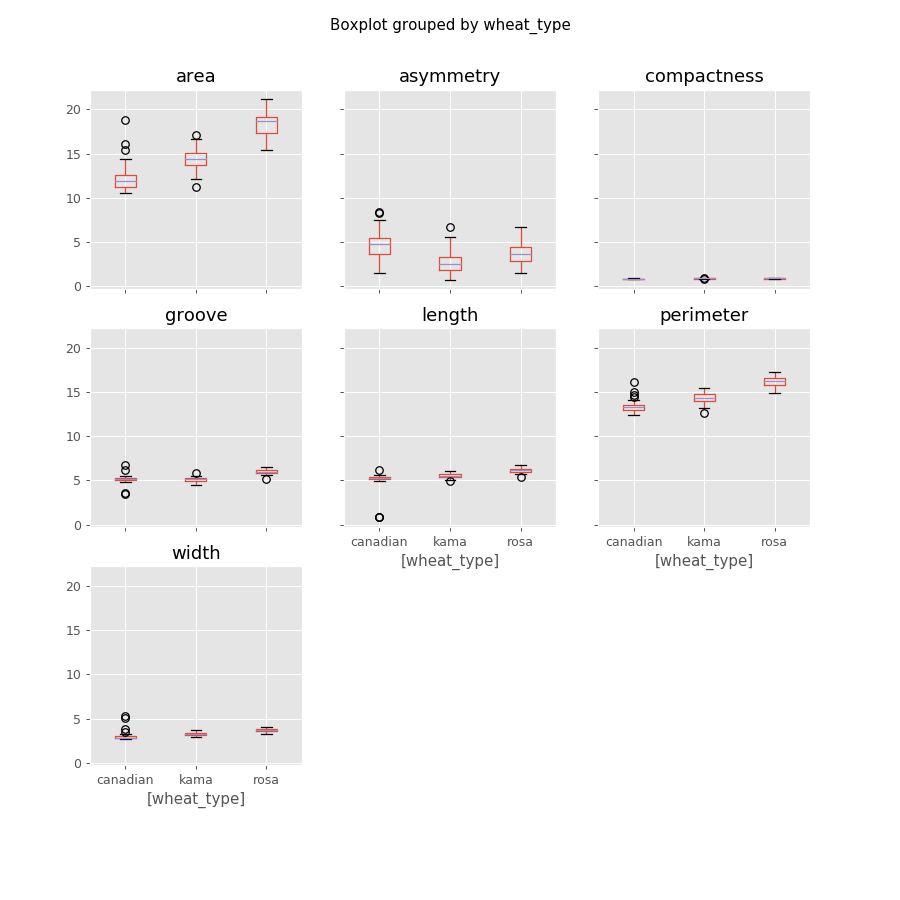

C:\Users\Renata\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CB33400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D053B70>]], dtype=object)

In [71]:
# Boxplots grouped by wheat type

df.boxplot(by = 'wheat_type', figsize = (10,10))

The properties that vary the most according to wheat type are: area, perimeter and assymetry.
Let's use histograms to look at these properties a bit deeper.

<IPython.core.display.Javascript object>


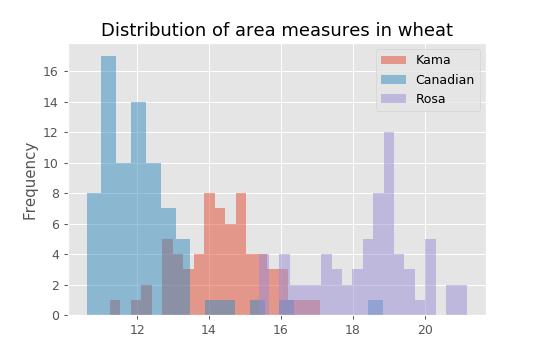

In [72]:
# Histogram of area layered by wheat type

fig = plt.figure()
df[df.wheat_type == "kama"].area.plot.hist(
    label = "Kama", bins = 20, alpha = 0.5)
df[df.wheat_type == "canadian"].area.plot.hist(
    label = "Canadian", bins = 20, alpha = 0.5)
df[df.wheat_type == "rosa"].area.plot.hist(
    label = "Rosa", bins = 20, alpha = 0.5)
plt.title("Distribution of area measures in wheat")
plt.legend()


<IPython.core.display.Javascript object>


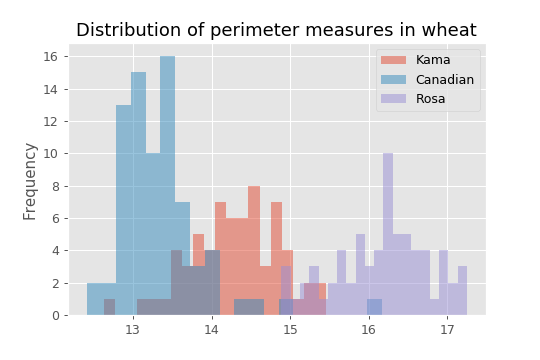

In [73]:
# Histogram of perimeter layered by wheat type

fig = plt.figure()
df[df.wheat_type == "kama"].perimeter.plot.hist(
    label = "Kama", bins = 20, alpha = 0.5)
df[df.wheat_type == "canadian"].perimeter.plot.hist(
    label = "Canadian", bins = 20, alpha = 0.5)
df[df.wheat_type == "rosa"].perimeter.plot.hist(
    label = "Rosa", bins = 20, alpha = 0.5)
plt.title("Distribution of perimeter measures in wheat")
plt.legend()

<IPython.core.display.Javascript object>


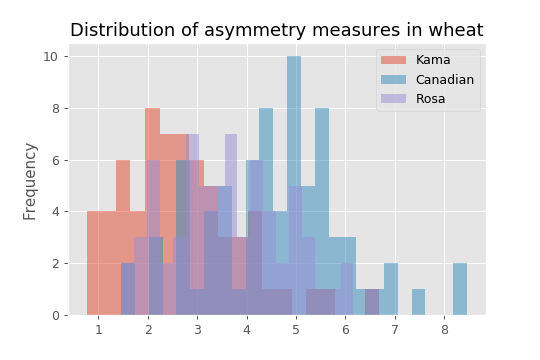

In [74]:
# Histogram of asymmetry layered by wheat type

fig = plt.figure()
df[df.wheat_type == "kama"].asymmetry.plot.hist(
    label = "Kama", bins = 20, alpha = 0.5)
df[df.wheat_type == "canadian"].asymmetry.plot.hist(
    label = "Canadian", bins = 25, alpha = 0.5)
df[df.wheat_type == "rosa"].asymmetry.plot.hist(
    label = "Rosa", bins = 20, alpha = 0.5)
plt.title("Distribution of asymmetry measures in wheat")
plt.legend()

We can try a 3D plot that shows those three features at once.

In [75]:
# Slice dataframe to obtain the features for each group of wheat type

kama = df[df.wheat_type == 'kama']
can = df[df.wheat_type == 'canadian']
rosa = df[df.wheat_type == 'rosa']

<IPython.core.display.Javascript object>


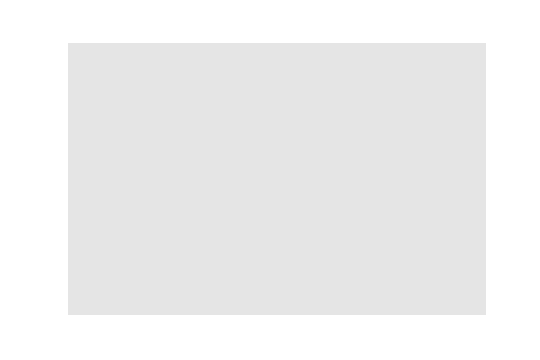

Text(0.5,0.98,'Area vs. perimeter vs. asymmetry')

In [76]:
fig = plt.figure()

# Set axes and plot
ax = fig.add_subplot(111, projection = '3d') # Add 3D subplot
ax.set_xlabel('Area')
ax.set_ylabel('Perimeter')
ax.set_zlabel('Asymmetry')

ax.scatter(kama.area, kama.perimeter, kama.asymmetry,
           color = 'r', marker = '.')
ax.scatter(can.area, can.perimeter, can.asymmetry,
           color = 'b', marker = '.')
ax.scatter(rosa.area, rosa.perimeter, rosa.asymmetry,
           color = 'g', marker = '.')
plt.suptitle("Area vs. perimeter vs. asymmetry")

To confirm is these features are the most suitable to classify wheat types, we can run a PCA on the dataframe and plot the vectors and order features by importance.

In [77]:
# Load library
from sklearn import preprocessing

# Define a function that scales the features
def scaleFeaturesDF(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    print("New variances:\n", scaled.var())
    print("New describe:\n", scaled.describe())
    return scaled

In [78]:
# Define a function that plots the vectors equivalent to features importance
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)
    num_columns = len(columns)
    # Scale the principal components by the max value in the transformed set
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])
    # Sort each original column by length
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)
    ax = plt.axes()
    for i in range(num_columns):
        # Use an arrow to project each original feature as a labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)
    return ax

In [79]:
# Check the data types
df.dtypes

# Drop the nominal feature
df = df.drop(['wheat_type'], axis = 1)

In [80]:
# Drop any rows with NAs
df = df.dropna(axis = 0)

# Reset indexes
df = df.reset_index(drop = True)

# Check the dataframe
df

,area,perimeter,compactness,length,width,asymmetry,groove
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219
7,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877
8,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533
9,15.26,14.85,0.8696,5.714,3.242,4.5430,5.314


In [81]:
# Check and print the variance of each feature
print(df.var())

# Print the summary stats of the dataframe
print(df.describe())

area           8.525549
perimeter      1.715733
compactness    0.000545
length         0.196753
width          0.143201
asymmetry      2.263380
groove         0.242794
dtype: float64
             area   perimeter  compactness      length       width  \
count  203.000000  203.000000   203.000000  203.000000  203.000000   
mean    14.906502   14.588719     0.870930    5.640291    3.264305   
std      2.919854    1.309860     0.023336    0.443569    0.378419   
min     10.590000   12.410000     0.808100    4.899000    2.630000   
25%     12.330000   13.465000     0.857100    5.265000    2.954500   
50%     14.380000   14.370000     0.873400    5.541000    3.242000   
75%     17.455000   15.805000     0.887050    6.002000    3.564500   
max     21.180000   17.250000     0.918300    6.675000    4.033000   

        asymmetry      groove  
count  203.000000  203.000000  
mean     3.710425    5.419754  
std      1.504453    0.492741  
min      0.765100    4.519000  
25%      2.570000    5.045

In [82]:
# Scale features and check variances
scaleFeatures = True
if scaleFeatures: df = scaleFeaturesDF(df)

New variances:
 area           1.00495
perimeter      1.00495
compactness    1.00495
length         1.00495
width          1.00495
asymmetry      1.00495
groove         1.00495
dtype: float64
New describe:
                area     perimeter   compactness        length         width  \
count  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02  2.030000e+02   
mean   8.367691e-16 -1.266639e-15  4.559845e-15  3.138704e-15 -5.983172e-16   
std    1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00  1.002472e+00   
min   -1.481983e+00 -1.667434e+00 -2.699120e+00 -1.675328e+00 -1.680341e+00   
25%   -8.845894e-01 -8.600135e-01 -5.941260e-01 -8.481624e-01 -8.207066e-01   
50%   -1.807638e-01 -1.673919e-01  1.061068e-01 -2.243983e-01 -5.908936e-02   
75%    8.749745e-01  9.308535e-01  6.924980e-01  8.174685e-01  7.952465e-01   
max    2.153877e+00  2.036752e+00  2.034969e+00  2.338458e+00  2.036351e+00   

          asymmetry        groove  
count  2.030000e+02  2.030000e+02  
mean   8.

<IPython.core.display.Javascript object>


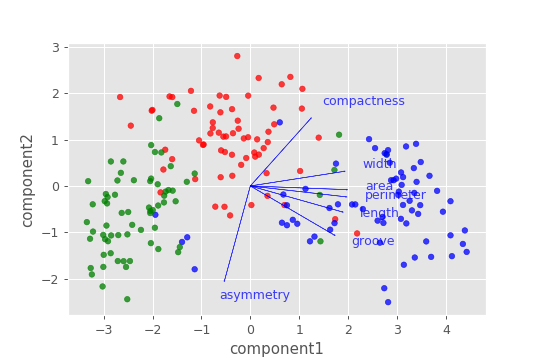

Features by importance:
 [(2.1066119605665645, 'asymmetry'), (2.0126418937656467, 'groove'), (1.965440542748402, 'area'), (1.9650487682019087, 'perimeter'), (1.9565630774614586, 'length'), (1.9390373217560561, 'width'), (1.9053186699091285, 'compactness')]


In [85]:
# Import PCA library
from sklearn.decomposition import PCA
import math

# Run PCA
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(df)
PCA(copy = True, n_components = 2, whiten = False)
T = pca.transform(df)

# Plot the results

fig = plt.figure()

ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T  = pd.DataFrame(T)

T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c=labels, alpha=0.75, ax=ax)



It seems groove is actually more "important" (or present more variance) to determine wheat types than perimeter!
This is very useful information for a classification model.